In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
exp_name = 'exp_1'

In [14]:
df1 = pd.read_csv('results/{0}/control_val_results.csv'.format(exp_name))
df1

FileNotFoundError: [Errno 2] File b'results/exp_1/control_val_results.csv' does not exist: b'results/exp_1/control_val_results.csv'

In [15]:
df2 = pd.read_csv('results/{0}/utility_classifier_val_results.csv'.format(exp_name))
df2

,date,eps,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.587160e+09,10,0,0,-148.378734,224,616,83,757,0.583929
1,1.587160e+09,20,0,0,-85.797069,273,567,110,730,0.597024
2,1.587161e+09,30,0,0,-42.525756,424,416,190,650,0.639286
3,1.587161e+09,40,0,0,-37.510682,413,427,168,672,0.645833
4,1.587162e+09,100,0,0,-16.416497,837,3,275,565,0.834524


In [16]:
df3 = pd.read_csv('results/{0}/control_test_results.csv'.format(exp_name))
df3

FileNotFoundError: [Errno 2] File b'results/exp_1/control_test_results.csv' does not exist: b'results/exp_1/control_test_results.csv'

In [17]:
df23 = pd.read_csv('results/{0}/utility_classifier_test_results.csv'.format(exp_name))
df23

,date,eps,iter,use_top_k,threshold,tn,fp,fn,tp,acc
0,1.587160e+09,10,0,0,-148.378734,327,873,133,1067,0.580833
1,1.587160e+09,20,0,0,-85.797069,401,799,162,1038,0.599583
2,1.587161e+09,30,0,0,-42.525756,616,584,272,928,0.643333
3,1.587161e+09,40,0,0,-37.510682,577,623,241,959,0.640000
4,1.587162e+09,100,0,0,-16.416497,1195,5,350,850,0.852083


In [18]:
df4 = pd.read_csv('results/{0}/utility_classifier_test_results.csv'.format(exp_name))
df_acc = df4[['eps', 'acc']]
df_acc

,eps,acc
0,10,0.580833
1,20,0.599583
2,30,0.643333
3,40,0.640000
4,100,0.852083


In [19]:
df5 = pd.read_csv('results/{0}/utility_similarity_test_results.csv'.format(exp_name))
df_hamming = df5[df5['metric'] == 'hamming']
df_hamming_metric = df_hamming[['eps', 'mean_all']]
df_hamming_metric

,eps,mean_all
0,10,0.699467
3,20,0.453122
6,30,0.331269
9,40,0.269589
12,100,0.112609


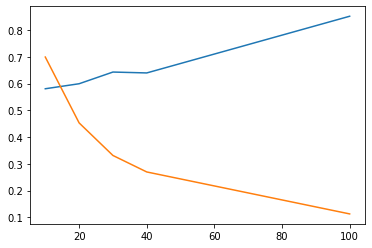

In [20]:
plt.plot(df_acc['eps'], df_acc['acc'])
plt.plot(df_hamming_metric['eps'], df_hamming_metric['mean_all'])

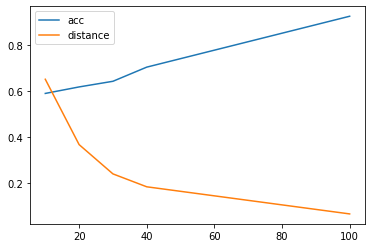

In [9]:

plt.legend(['acc', 'distance'])
plt.show()

In [21]:
df6 = pd.read_csv('results/{0}/utility_similarity_test_results.csv'.format(exp_name))
df_metric = df6[df6['metric'] == 'cosine']
df_metric_c = df_metric[['eps', 'mean_all']]
df_metric_c

,eps,mean_all
2,10,0.149068
5,20,0.061460
8,30,0.044070
11,40,0.037209
14,100,0.017350


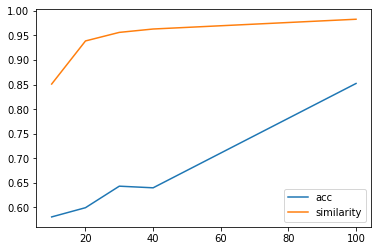

In [22]:
plt.plot(df_acc['eps'], df_acc['acc'])
plt.plot(df_metric_c['eps'], 1 - df_metric_c['mean_all'])
plt.legend(['acc', 'similarity'])
plt.show()